# ITMAL Exercise

REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0206| CEF, updated and spell checked. 
2018-0208| CEF, minor text updata. 

## Implementing a dummy classifier with fit-predict interface

We begin with the MNIST data-set and will reuse the data loader you just created. Next we create a dummy classifier, and compare the results of the SGD and dummy classifiers using the MNIST data...

#### Qa  Add a Stochastic Gradient Decent [SGD] Classifier

Create a train-test data-set for MNIST and then add the `SGDClassifier` as done in [HOLM], p82.

Split your data and run the fit-predict for the classifier using the MNIST data.

Notice that you have to reshape the MNIST X-data to be able to use the classifier. It may be a 3D array, consisting of 70000 (28 x 28) images, or just a 2D array consisting of 70000 elements of size 784.

A simple `reshape()` could fix this on-the-fly:
```python
X, y = MNIST_GetDataSet()

print("X.shape=",X.shape) # print X.shape= (70000, 28, 28)
if X.ndim==3:
    print("reshaping X..")
    assert y.ndim==1
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
assert X.ndim==2
print("X.shape=",X.shape) # X.shape= (70000, 784)
```

Remember to use the category-5 y inputs

```python
y_train_5 = (y_train == 5)    
y_test_5  = (y_test == 5)
```
instead of the `y`'s you are getting out of the dataloader...

Test your model on using the test data, and try to plot numbers that have been categorized correctly. Then also find and plots some misclassified numbers.

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7244562402523822805
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14997293877774568460
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 1371504960474445750
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7149099418
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7618411546315936668
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:41:00.0, compute capability: 6.1"
]


Using TensorFlow backend.


reshaping X and y..


/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Showing the predicted 5s


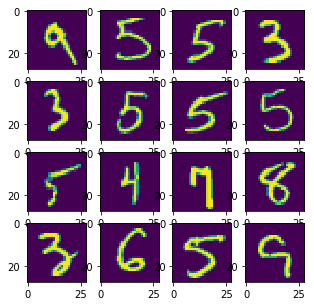

Showing numbers that are predicted to not be 5


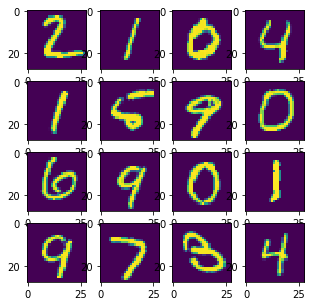

In [2]:
# TODO: Qa...

import sys,os
import numpy as np
sys.path.append(os.path.expanduser('/home/hermansen/Desktop/jupyter/itmal/itmal-25/itmal-25f'))
%matplotlib inline

import libitmal.dataloader as dataloader
%load_ext autoreload

%autoreload
(X_train, y_train), (X_test, y_test) = dataloader.MNIST_GetDataSet()

# Shuffle the data
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# reshape our date for train
if X_train.ndim==3 and X_test.ndim==3:
    print("reshaping X and y..")
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

# setting our classification "5s"
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

# Classify and fit
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Predict with our test data
arraytrue = sgd_clf.predict(X_test)

# sort data
correct_list = []
incorrect_list = []

for i in range(0, len(arraytrue)):
    if arraytrue[i] == True:
        correct_list.append(X_test[i])
    else:
        incorrect_list.append(X_test[i])

import matplotlib.pyplot as plt
        
# group plot
def plot_digit(data, fignr):
    w=10
    h=10
    fig=plt.figure(fignr, figsize=(5, 5))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        img = data[i].reshape(28, 28)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

# show predictions
print("Showing the predicted 5s")
plot_digit(correct_list, 0)

print("Showing numbers that are predicted to not be 5")
plot_digit(incorrect_list, 1)

#### Qb Implement a dummy binary classifier

Follow the code found in [HOML], p84, but name you estimator `DummyClassifier` instead of `Never5Classifyer`.

Here our Python class knowledge comes into play. The estimator class hierarchy looks like

<img src="Figs/class_base_estimator.png" style="width:500px">

All Scikit-learn classifiers inherit form `BaseEstimator` (and possible also `ClassifierMixin`), and they must have a `fit-predict` function pair (strangely not in the base class!) and you can actually find the `sklearn.base.BaseEstimator` and `sklearn.base.ClassifierMixin` python source code somewhere in you anaconda install dir, if you should have the nerves to go to such interesting details.

But surprisingly you may just want to implement a class that contains the `fit-predict` functions, ___without inheriting___ from the `BaseEstimator`, things still work due to the pythonic 'duck-typing': you just need to have the class implement the needed interfaces, obviously `fit()` and `predict()` but also the more obscure `get_params()` etc....then the class 'looks like' a `BaseEstimator`...and if it looks like an estimator, it _is_ an estimator (aka. duct typing).

Templates in C++ also allow the language to use compile-time duck typing!

> https://en.wikipedia.org/wiki/Duck_typing

Call the fit-predict on a newly instantiated `DummyClassifier` object, and try to compare the confusion matrix for both the dummy and SDG classifier.

We will be discussing the confusion matrix next, but first, print the `y_test_5.shape` and count the numbers of `y_test_5==True` and `y_test_5==False` and see if you can find these numbers in the confusion matrix.

In [21]:
# TODO: Qb Needs a bit of follow-up

import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import libitmal.utils as itmalutils

# Dummy classifier
class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

model = DummyClassifier()    

print("y_test_5 shape: ", y_test_5.shape)

y5_true = []
y5_false = []
for y in y_test_5:
    if y == True:
        y5_true.append(y)
    else:
        y5_false.append(y)
print("y == 5 count:", len(y5_true), "y != 5 count:", len(y5_false))
        
c_sgd=cross_val_score(sgd_clf, X_test, y_test, cv=3, scoring="accuracy")
print("SGD, c=",c_sgd)
c_dummy=cross_val_score(model, X_test, y_test, cv=3, scoring="accuracy")
print("Dummy, c=",c_dummy)

y_sgd_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
y_dummy_pred = cross_val_predict(model, X_test, y_test_5, cv=3)

# Inspiration for running cross evaluation on a model, and printing the confusion matrix:
M=confusion_matrix(y_test_5, y_sgd_pred)
itmalutils.PrintMatrix(M,"SGD, M=")
M=confusion_matrix(y_test_5, y_dummy_pred)
itmalutils.PrintMatrix(M,"Dummy, M=")

y_test_5 shape:  (10000,)
y == 5 count: 892 y != 5 count: 9108


/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassi

SGD, c= [0.81605752 0.87008701 0.86933013]
Dummy, c= [0.0914817  0.0990099  0.10351035]


/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/hermansen/Desktop/jupyter/env/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassi

SGD, M=[[8957  151]
        [ 245  647]]
Dummy, M=[[9108    0]
          [ 892    0]]
